# Лабораторная работа №3: Частотный анализ полиномиальных приближений

Выполнили студенты гр. 2381 Комосский Егор Артемович и Рыжиков Иван Сергеевич. Вариант №6.

## Цель работы

Провести анализ частотных характеристик известных формул полиномиального сглаживания временных рядов.


## Основные теоретические положения

Циклическая частота связана с частотой следующим соотношением:
$\omega = 2 \pi f$

Входной сигнал $s(t)$

$$ s(t) = \sum_{k=1}^{N} c_k \cdot e^{j 2 \pi f_k t} $$

Выходной сигнал $y(t)$

$$ y(t) = \sum_{k=1}^{N} c_k \cdot \tilde{H}(f_k) \cdot e^{j 2 \pi f_k t} $$
где $\tilde{H}(f)$ - передаточная функция фильтра.

## Постановка задачи

Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для полиномов различного порядка и построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных степеней полиномов.



## Выполнение работы

In [7]:
# Импорт необходимых библиотек
import math
import numpy as np
import matplotlib.pyplot as plt



### Задание 1

Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию прямой линией по 3, 5, 7 и 9 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Входной сигнал s(t).

Нерекурсивный фильтр, соответствующий сглаживанию прямой линией, задаётся следующей формулой:

$$y(t) = A + Bt$$

Для нахождения коэффициентов A и B решаем систему уравнений МНК:

$$
F_{2h + 1}(A, B) = \sum_{k=-1}^{k=1} (s_k - y_k)^2 = \sum_{k=-1}^{k=1} (s_k - A - Bk)^2 \to \min_{A, B}
$$

Берем частные производные по A и B и приравниваем их к нулю:

$$
\begin{cases}
\frac{\partial F_{2h + 1}}{\partial A} = -2 \sum_{k=-h}^{k=h} (s_k - A - Bk) = 0 \\
\frac{\partial F_{2h + 1}}{\partial B} = -2 \sum_{k=-h}^{k=h} k(s_k - A - Bk) = 0
\end{cases}
$$

Решая эту систему уравнений, получаем:

$$
\begin{cases}
A = \frac{1}{2h + 1} \sum_{k=-h}^{k=h} s_k \\
B = \frac{3}{h(h + 1)(2h + 1)} \sum_{k=-h}^{k=h} k s_k
\end{cases}
$$

Подставляя $A$ и $B$ в уравнение для $y(t)$, получаем формулу для сглаживания прямой линией по $2h + 1$ точкам:

$$
y(t) = \frac{1}{2h + 1} \sum_{k=-h}^{k=h} s_k + \frac{3t}{h(h + 1)(2h + 1)} \sum_{k=-h}^{k=h} k s_k
$$

Для первой точке $y_0$ получаем:

$$
y_0 = A = \frac{1}{2h + 1} \sum_{k=-h}^{k=h} s_k
$$

Сдвигая окно фильтра, делая произвольную точку $y_n$ центром окна, получаем:

$$
y_n = \frac{1}{2h + 1} \sum_{k=-h}^{k=h} s_{n + k}
$$

Это соответствует скользящему среднему с окном шириной $2h + 1$.

Пусть $s_n = e^{i \omega n}$, тогда выходной сигнал будет:

$$
y_n = \frac{1}{2h + 1} \sum_{k=-h}^{k=h} e^{i \omega (n + k)} = \frac{e^{i \omega n}}{2h + 1} \sum_{k=-h}^{k=h} e^{i \omega k} = e^{i \omega n} H_{2h + 1} (\omega)
$$

где $H_{2h + 1} (\omega)$ — передаточная функция фильтра:

$$
H_{2h + 1} (\omega) = \frac{1}{2h + 1} \sum_{k=-h}^{k=h} e^{i \omega k}
$$

Воспользуемся равенством $ \cos x = \frac{e^{ix} + e^{-ix}}{2} $ для преобразования суммы:
$$
H_{2h + 1} (\omega) = \frac{1}{2h + 1} \left( 1 + 2 \sum_{k=1}^{h} \cos(\omega k) \right)
$$

Если использовать формулы геометрической прогрессии, то можно получить:
$$
H_{2h + 1} (\omega) = \cfrac{1}{(2h + 1)} \cfrac{e^{-iwh} (e^{iw(2h + 1)} - 1)}{e^{iw} - 1} = \cfrac{1}{(2h + 1)} \cfrac{ (e^{iw(h + \frac{1}{2})} - e^{-iw(h + \frac{1}{2})})}{e^{iw\frac{1}{2}} - e^{-iw\frac{1}{2}}} = \frac{1}{2h + 1} \cdot \frac{\sin\left( (2h + 1) \frac{\omega}{2} \right)}{\sin\left( \frac{\omega}{2} \right)}
$$

Итого, $\tilde{H}(f)$ имеет вид:
$$
\tilde{H}(f) = H (2 \pi f) = \frac{1}{2h + 1} \cdot \frac{\sin\left( (2h + 1) \pi f \right)}{\sin\left( \pi f \right)}
$$

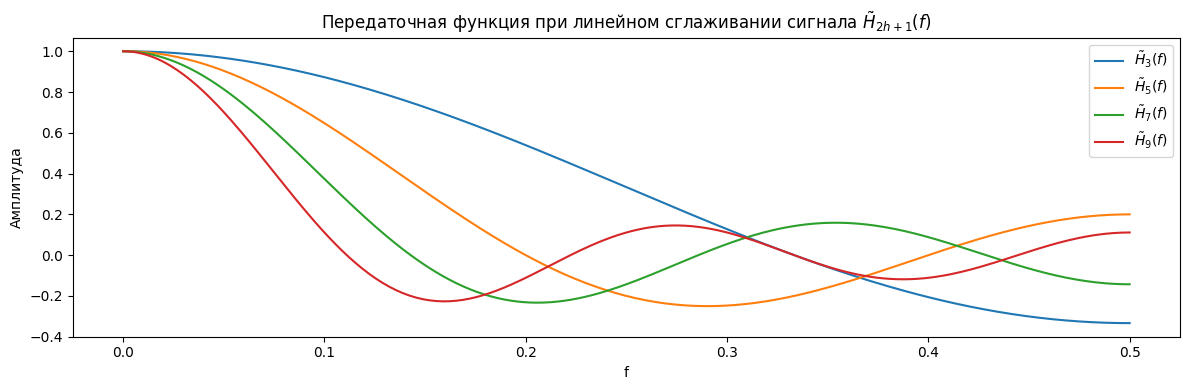

In [17]:
def H_1(f, h):
    return np.divide(
        1 / (2 * h + 1) * np.sin(2 * math.pi * f * (h + 1 / 2)),
        np.sin(math.pi * f),
        out=np.ones_like(f),
        where=np.sin(math.pi * f) != 0,
    )


f = np.linspace(-0.0, 0.5, 300)

plt.figure(figsize=(12, 4))

for i in range(1, 5):
    plt.plot(f, H_1(f, i), label="$ \\tilde{H}_{" + str(2 * i + 1) + "}(f) $")

plt.title(
    'Передаточная функция при линейном сглаживании сигнала $ \\tilde{H}_{2h+1}(f) $'
)
plt.ylabel('Амплитуда')
plt.xlabel('f')

plt.tight_layout()
plt.legend()
plt.show()

Как видно из графика, во первых фильтр является низкочастотным, так как при увеличении частоты амплитуда передаточной функции уменьшается. Во вторых, чем больше количество точек для сглаживания, тем уже становится главная полоса пропускания фильтра, что говорит о том, что фильтр становится более избирательным к низким частотам.

Также заметно колебание амплитуды передаточной функции с увеличением частоты.

### Задание 2

Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом второй степени по 7, 9, 11 и 13 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.


Для сглаживания полиномом второй степени по $2h + 1$ точкам, фильтр задаётся следующей формулой:

$$y(t) = A + Bt + Ct^2$$

Для нахождения коэффициентов A, B и C решаем систему уравнений МНК:

$$
F_{2h + 1}(A, B, C) = \sum_{k=-h}^{k=h} (s_k - y_k)^2 = \sum_{k=-h}^{k=h} (s_k - A - Bk - Ck^2)^2 \to \min_{A, B, C}
$$

Берем частные производные по A, B и C и приравниваем их к нулю:

$$
\begin{cases}
\frac{\partial F_{2h + 1}}{\partial A} = -2 \sum_{k=-h}^{k=h} (s_k - A - Bk - Ck^2) = 0 \\
\frac{\partial F_{2h + 1}}{\partial B} = -2 \sum_{k=-h}^{k=h} k(s_k - A - Bk - Ck^2) = 0 \\
\frac{\partial F_{2h + 1}}{\partial C} = -2 \sum_{k=-h}^{k=h} k^2(s_k - A - Bk - Ck^2) = 0
\end{cases}
$$

Т.к. $\sum_{k=-h}^{k=h} k = 0$ и $\sum_{k=-h}^{k=h} k^3 = 0$, система упрощается до следующего вида:

$$
\begin{cases}
\sum_{k=-h}^{k=h} s_k = (2h + 1) A + C \sum_{k=-h}^{k=h} k^2 \\
\sum_{k=-h}^{k=h} k s_k = B \sum_{k=-h}^{k=h} k^2 \\
\sum_{k=-h}^{k=h} k^2 s_k = A \sum_{k=-h}^{k=h} k^2 + C \sum_{k=-h}^{k=h} k^4
\end{cases}
$$

Решая эту систему уравнений, получаем:

$$
\begin{cases}
A = \frac{\sum s_k \sum k^4 - \sum k^2 \sum k^2 s_k}{(2h + 1) \sum k^4 - (\sum k^2)^2} \\
B = \frac{\sum k s_k}{\sum k^2} \\
C = \frac{\sum k^2 s_k - A \sum k^2}{\sum k^4}
\end{cases}
$$


Так как фильтр используется для сглаживания, нас интересует только коэффициент A, который отвечает за значение в центре окна сглаживания. Таким образом, выходной сигнал для точки $y_n$ будет:

$$
y_n = A = \frac{\sum_{k=-h}^{k=h} s_{n + k} \sum_{k=-h}^{k=h} k^4 - \sum_{k=-h}^{k=h} k^2 \sum_{k=-h}^{k=h} k^2 s_{n + k}}{(2h + 1) \sum_{k=-h}^{k=h} k^4 - (\sum_{k=-h}^{k=h} k^2)^2}
$$

Подставим значение для сумм $\sum_{k=-h}^{k=h} k^2 = \frac{h(h+1)(2h+1)}{3}$ и $\sum_{k=-h}^{k=h} k^4= \frac {h(h+1)(2h+1)(3h^2 + 3h -1)}{15}$:

$$
y_n = \frac{\sum_{k=-h}^{k=h} s_{n + k} \cdot \frac {h(h+1)(2h+1)(3h^2 + 3h -1)}{15} - \frac{h(h+1)(2h+1)}{3} \cdot \sum_{k=-h}^{k=h} k^2 s_{n + k}}{(2h + 1) \cdot \frac {h(h+1)(2h+1)(3h^2 + 3h -1)}{15} - \left(\frac{h(h+1)(2h+1)}{3}\right)^2} \\
= \frac{3}{(2h+1)((4h^2 + 4h -3))} \left[ (3h^2 + 3h - 1) \sum_{k=-h}^{k=h} s_{n + k} - 5 \sum_{k=-h}^{k=h} k^2 s_{n + k} \right]
$$


Найдем передаточную функцию.

Пусть $s_n = e^{i \omega n}$, тогда выходной сигнал будет:

$$
y_n = \frac{3}{(2h+1)((4h^2 + 4h -3))} \left[ (3h^2 + 3h - 1) \sum_{k=-h}^{k=h} e^{i \omega (n + k)} - 5 \sum_{k=-h}^{k=h} k^2 e^{i \omega (n + k)} \right] = e^{i \omega n} H_{2h + 1} (\omega)
$$

где $H_{2h + 1} (\omega)$ — передаточная функция фильтра:

$$
H_{2h + 1} (\omega) = \frac{3}{(2h+1)((4h^2 + 4h -3))} \left[ (3h^2 + 3h - 1) \sum_{k=-h}^{k=h} e^{i \omega k} - 5 \sum_{k=-h}^{k=h} k^2 e^{i \omega k} \right]
$$


Пользуясь равенством $ \cos x = \frac{e^{ix} + e^{-ix}}{2} $ для преобразования суммы, получаем:
$$
H_{2h + 1} (\omega) = \frac{3}{(2h+1)((4h^2 + 4h -3))} \left[ (3h^2 + 3h - 1) \left( 1 + 2 \sum_{k=1}^{h} \cos(\omega k) \right) - 10 \sum_{k=1}^{h} k^2 \cos(\omega k) \right]
$$

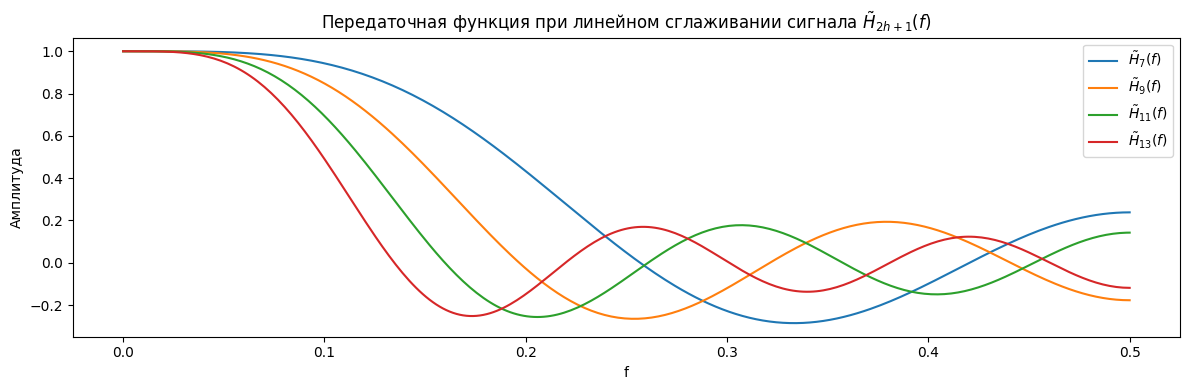

In [19]:
def H_2(f, h):
    sum_cos_0 = np.sum(
        [np.cos(2 * math.pi * f * k) for k in range(1, h + 1)], axis=0
    )
    sum_cos_2 = np.sum(
        [k**2 * np.cos(2 * math.pi * f * k) for k in range(1, h + 1)], axis=0
    )
    res = (3 / ((2 * h + 1) * (4 * h**2 + 4 * h - 3))) * (
        (3 * h**2 + 3 * h - 1) * (1 + 2 * sum_cos_0) - 10 * sum_cos_2
    )
    return res

f = np.linspace(-0.0, 0.5, 300)

plt.figure(figsize=(12, 4))

for i in range(3, 7):
    plt.plot(f, H_2(f, i), label="$ \\tilde{H}_{" + str(2 * i + 1) + "}(f) $")

plt.title(
    'Передаточная функция при линейном сглаживании сигнала $ \\tilde{H}_{2h+1}(f) $'
)
plt.ylabel('Амплитуда')
plt.xlabel('f')

plt.tight_layout()
plt.legend()
plt.show()

Из графика видно, что фильтр основанный на полиноме второй степени также является низкочастотным фильтром. При увеличении количества точек для сглаживания, главная полоса пропускания становится уже, что говорит о том, что фильтр становится более избирательным к низким частотам.

По сравнению с фильтром на основе прямой линии, фильтр имеет более сильное подавление высоких частот, что делает его более эффективным для сглаживания сигналов с высоким уровнем шума.

### Задание 3

Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом четвёртой степени по 9, 11, 13 и 15 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Выходной сигнал для сглаживания полиномом четвёртой степени по $2h + 1$ точкам задаётся следующей формулой:

$$y(t) = A + Bt + Ct^2 + Dt^3 + Et^4$$

Для нахождения коэффициентов A, B, C, D и E решаем систему уравнений МНК:
$$
F_{2h + 1}(A, B, C, D, E) = \sum_{k=-h}^{k=h} (s_k - y_k)^2 = \sum_{k=-h}^{k=h} (s_k - A - Bk - Ck^2 - Dk^3 - Ek^4)^2 \to \min_{A, B, C, D, E}
$$
Берем частные производные по A, B, C, D и E и приравниваем их к нулю:
$$
\begin{cases}
\frac{\partial F_{2h + 1}}{\partial A} = -2 \sum_{k=-h}^{k=h} (s_k - A - Bk - Ck^2 - Dk^3 - Ek^4) = 0 \\
\frac{\partial F_{2h + 1}}{\partial B} = -2 \sum_{k=-h}^{k=h} k(s_k - A - Bk - Ck^2 - Dk^3 - Ek^4) = 0 \\
\frac{\partial F_{2h + 1}}{\partial C} = -2 \sum_{k=-h}^{k=h} k^2(s_k - A - Bk - Ck^2 - Dk^3 - Ek^4) = 0 \\
\frac{\partial F_{2h + 1}}{\partial D} = -2 \sum_{k=-h}^{k=h} k^3(s_k - A - Bk - Ck^2 - Dk^3 - Ek^4) = 0 \\
\frac{\partial F_{2h + 1}}{\partial E} = -2 \sum_{k=-h}^{k=h} k^4(s_k - A - Bk - Ck^2 - Dk^3 - Ek^4) = 0
\end{cases}
$$

Т.к. $\sum_{k=-h}^{k=h} k = 0$, $\sum_{k=-h}^{k=h} k^3 = 0$, система упрощается до следующего вида:

$$
\begin{cases}
\sum_{k=-h}^{k=h} s_k = \sum_{k=-h}^{k=h} A + C \sum_{k=-h}^{k=h} k^2 + E \sum_{k=-h}^{k=h} k^4 \\
\sum_{k=-h}^{k=h} k s_k = B \sum_{k=-h}^{k=h} k^2 + D \sum_{k=-h}^{k=h} k^4 \\
\sum_{k=-h}^{k=h} k^2 s_k = A \sum_{k=-h}^{k=h} k^2 + C \sum_{k=-h}^{k=h} k^4 + E \sum_{k=-h}^{k=h} k^6 \\
\sum_{k=-h}^{k=h} k^3 s_k = B \sum_{k=-h}^{k=h} k^4 + D \sum_{k=-h}^{k=h} k^6 \\
\sum_{k=-h}^{k=h} k^4 s_k = A \sum_{k=-h}^{k=h} k^4 + C \sum_{k=-h}^{k=h} k^6 + E \sum_{k=-h}^{k=h} k^8
\end{cases}
$$

Откуда можно найти коэффициент A, отвечающий за значение в центре окна сглаживания.

Нас интересуют только уравнения для A, C и E:

$$
\begin{cases}
\sum_{k=-h}^{k=h} s_k = \sum_{k=-h}^{k=h} A + C \sum_{k=-h}^{k=h} k^2 + E \sum_{k=-h}^{k=h} k^4 \\
\sum_{k=-h}^{k=h} k^2 s_k = A \sum_{k=-h}^{k=h} k^2 + C \sum_{k=-h}^{k=h} k^4 + E \sum_{k=-h}^{k=h} k^6 \\
\sum_{k=-h}^{k=h} k^4 s_k = A \sum_{k=-h}^{k=h} k^4 + C \sum_{k=-h}^{k=h} k^6 + E \sum_{k=-h}^{k=h} k^8
\end{cases}
$$

Введём обозначения для сумм:

$$
S_m = \sum_{k=-h}^{k=h} k^m, \quad R_m = \sum_{k=-h}^{k=h} k^m s_{k}
$$

Тогда система уравнений примет вид:

$$
\begin{cases}
R_0 = A S_0 + C S_2 + E S_4 \\
R_2 = A S_2 + C S_4 + E S_6 \\
R_4 = A S_4 + C S_6 + E S_8
\end{cases}
$$

Решая эту систему уравнений, получаем выражение для A:

$$
y_0 = A = \frac{R_0 (S_4 S_8 - S_6^2) - R_2 (S_2 S_8 - S_4 S_6) + R_4 (S_2 S_6 - S_4^2)}{S_0 (S_4 S_8 - S_6^2) - S_2 (S_2 S_8 - S_4 S_6) + S_4 (S_2 S_6 - S_4^2)}
$$

Сдвигая окно фильтра, делая произвольную точку $y_n$ центром окна, получаем туже формулу, но с заменой $s_k$ на $s_{n + k}$:

$$
y_n = A = \frac{R_0 (S_4 S_8 - S_6^2) - R_2 (S_2 S_8 - S_4 S_6) + R_4 (S_2 S_6 - S_4^2)}{S_0 (S_4 S_8 - S_6^2) - S_2 (S_2 S_8 - S_4 S_6) + S_4 (S_2 S_6 - S_4^2)}$$
где уже $R_m = \sum_{k=-h}^{k=h} k^m s_{n + k}$.




Пусть $s_n = e^{i \omega n}$, тогда выходной сигнал будет:

$$
y_n = A = \frac{R_0 (S_4 S_8 - S_6^2) - R_2 (S_2 S_8 - S_4 S_6) + R_4 (S_2 S_6 - S_4^2)}{S_0 (S_4 S_8 - S_6^2) - S_2 (S_2 S_8 - S_4 S_6) + S_4 (S_2 S_6 - S_4^2)} = e^{i \omega n} H_{2h + 1} (\omega)
$$

где $H_{2h + 1} (\omega)$ — передаточная функция фильтра:
$$
H_{2h + 1} (\omega) = \frac{(S_4 S_8 - S_6^2) \cdot \sum_{k=-h}^{k=h} e^{i \omega k} - (S_2 S_8 - S_4 S_6) \cdot \sum_{k=-h}^{k=h} k^2 e^{i \omega k} + (S_2 S_6 - S_4^2) \cdot \sum_{k=-h}^{k=h} k^4 e^{i \omega k}}{S_0 (S_4 S_8 - S_6^2) - S_2 (S_2 S_8 - S_4 S_6) + S_4 (S_2 S_6 - S_4^2)}
$$

Пользуясь равенством $ \cos x = \frac{e^{ix} + e^{-ix}}{2} $ для преобразования суммы, получаем:

$$
H_{2h + 1} (\omega) = \frac{(S_4 S_8 - S_6^2) \left( 1 + 2 \sum_{k=1}^{h} \cos(\omega k) \right) - (S_2 S_8 - S_4 S_6) \cdot 2 \sum_{k=1}^{h} k^2 \cos(\omega k) + (S_2 S_6 - S_4^2) \cdot 2 \sum_{k=1}^{h} k^4 \cos(\omega k)}{S_0 (S_4 S_8 - S_6^2) - S_2 (S_2 S_8 - S_4 S_6) + S_4 (S_2 S_6 - S_4^2)} \\
= \frac{(S_4 S_8 - S_6^2) + 2 \sum_{k=1}^{h} \left[ (S_4 S_8 - S_6^2) - (S_2 S_8 - S_4 S_6) k^2 + (S_2 S_6 - S_4^2) k^4 \right] \cos(\omega k)}{S_0 (S_4 S_8 - S_6^2) - S_2 (S_2 S_8 - S_4 S_6) + S_4 (S_2 S_6 - S_4^2)}
$$


Итого, $\tilde{H}(f)$ имеет вид:

$$
\tilde{H}(f) = H (2 \pi f) = \frac{(S_4 S_8 - S_6^2) + 2 \sum_{k=1}^{h} \left[ (S_4 S_8 - S_6^2) - (S_2 S_8 - S_4 S_6) k^2 + (S_2 S_6 - S_4^2) k^4 \right] \cos(2 \pi f k)}{S_0 (S_4 S_8 - S_6^2) - S_2 (S_2 S_8 - S_4 S_6) + S_4 (S_2 S_6 - S_4^2)}
$$

<!-- Хочу индейку -->

<!-- 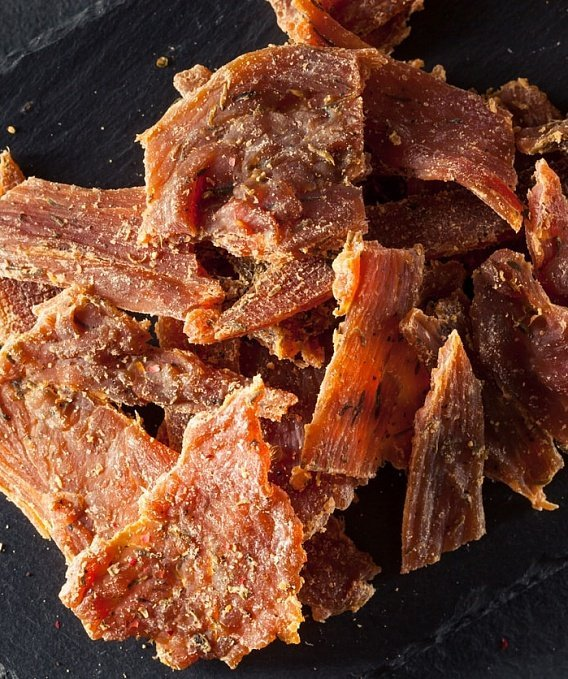 -->

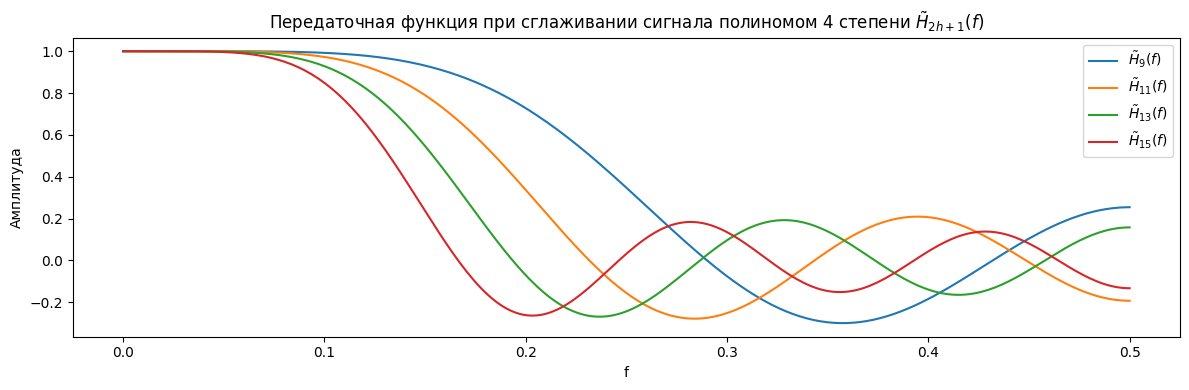

In [20]:
def H_3(f, h):
    def S(m):
        return sum([k**m for k in range(-h, h + 1)])

    S0 = S(0)
    S2 = S(2)
    S4 = S(4)
    S6 = S(6)
    S8 = S(8)
    D = S0 * (S4 * S8 - S6**2) - S2 * (S2 * S8 - S4 * S6) + S4 * (S2 * S6 - S4**2)
    a_cos = S4 * S8 - S6**2
    b_cos = -(S2 * S8 - S4 * S6)
    c_cos = S2 * S6 - S4**2
    sum_cos_0 = np.sum(
        [
            (a_cos + b_cos * k**2 + c_cos * k**4) * np.cos(2 * math.pi * f * k)
            for k in range(1, h + 1)
        ],
        axis=0,
    )
    res = (S4 * S8 - S6**2 + 2 * sum_cos_0) / D
    return res

f = np.linspace(-0.0, 0.5, 300)

plt.figure(figsize=(12, 4))
for i in range(4, 8):
    plt.plot(f, H_3(f, i), label="$ \\tilde{H}_{" + str(2 * i + 1) + "}(f) $")
    
plt.title(
    'Передаточная функция при сглаживании сигнала полиномом 4 степени $ \\tilde{H}_{2h+1}(f) $'
)
plt.ylabel('Амплитуда')
plt.xlabel('f')
plt.tight_layout()
plt.legend()
plt.show()


Как видно из графика, фильтр основанный на полиноме четвёртой степени также является низкочастотным фильтром.

При этом полоса пропускания стала заметно шире по сравнению с фильтрами на основе прямой линии и полинома второй степени при том же количестве точек для сглаживания. Это говорит о том, что фильтр на основе полинома четвёртой степени менее избирателен к низким частотам по сравнению с предыдущими двумя фильтрами.

При увеличении количества точек для сглаживания, главная полоса пропускания становится уже, что говорит о том, что фильтр становится более избирательным к низким частотам.

Также заметно колебание амплитуды передаточной функции с увеличением частоты.

### Задание 4

Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию по формулам Спенсера по 15 и 21 точкам. Построить графики $\tilde{H}(f)$
. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.



Выпишем формулы Спенсера для сглаживания по 15 и 21 точкам:

- По 15 точкам:

$
y_n = \frac{1}{320} (-3s_{n-7} - 6s_{n-6} - 5s_{n-5} + 3s_{n-4} + 21s_{n-3} + 46s_{n-2} + 67s_{n-1} + 74s_{n} + 67s_{n+1} + 46s_{n+2} + 21s_{n+3} + 3s_{n+4} - 5s_{n+5} - 6s_{n+6} - 3s_{n+7})
$

- По 21 точке:

$
y_n = \frac{1}{350} (-1s_{n-10} - 3s_{n-9} - 5s_{n-8} - 5s_{n-7} - 2s_{n-6} + 6s_{n-5} + 18s_{n-4} + 33s_{n-3} + 47s_{n-2} + 57s_{n-1} + 60s_{n} + 57s_{n+1} + 47s_{n+2} + 33s_{n+3} + 18s_{n+4} + 6s_{n+5} - 2s_{n+6} - 5s_{n+7} - 5s_{n+8} - 3s_{n+9} - 1s_{n+10})
$





При $s_n = e^{i \omega n}$, выходной сигнал для 15 точек будет:

$
y_n = \frac{1}{320} ( -3e^{i \omega (n-7)} - 6e^{i \omega (n-6)} - 5e^{i \omega (n-5)} + 3e^{i \omega (n-4)} + 21e^{i \omega (n-3)} + 46e^{i \omega (n-2)} + 67e^{i \omega (n-1)} + 74e^{i \omega n} + 67e^{i \omega (n+1)} + 46e^{i \omega (n+2)} + 21e^{i \omega (n+3)} + 3e^{i \omega (n+4)} - 5e^{i \omega (n+5)} - 6e^{i \omega (n+6)} - 3e^{i \omega (n+7)} ) = e^{i \omega n} H_{15} (\omega)
$

Передаточная функция фильтра для 15 точек будет:

$
H_{15} (\omega) = \frac{1}{320} ( -3e^{-i 7 \omega} - 6e^{-i 6 \omega} - 5e^{-i 5 \omega} + 3e^{-i 4 \omega} + 21e^{-i 3 \omega} + 46e^{-i 2 \omega} + 67e^{-i \omega} + 74 + 67e^{i \omega} + 46e^{i 2 \omega} + 21e^{i 3 \omega} + 3e^{i 4 \omega} - 5e^{i 5 \omega} - 6e^{i 6 \omega} - 3e^{i 7 \omega} )
$

Пользуясь равенством $ \cos x = \frac{e^{ix} + e^{-ix}}{2} $ для преобразования суммы, получаем:

$
H_{15} (\omega) = \frac{1}{320} ( 74 + 2( 67 \cos(\omega) + 46 \cos(2 \omega) + 21 \cos(3 \omega) + 3 \cos(4 \omega) - 5 \cos(5 \omega) - 6 \cos(6 \omega) - 3 \cos(7 \omega) ) )
$

Итого, $\tilde{H}(f)$ имеет вид:

$
\tilde{H}(f) = H (2 \pi f) = \frac{1}{320} ( 74 + 2( 67 \cos(2 \pi f) + 46 \cos(4 \pi f) + 21 \cos(6 \pi f) + 3 \cos(8 \pi f) - 5 \cos(10 \pi f) - 6 \cos(12 \pi f) - 3 \cos(14 \pi f) ) )
$

Аналогично, для 21 точки получаем:

$
\tilde{H}(f) = H (2 \pi f) = \frac{1}{350} ( 60 + 2( 57 \cos(2 \pi f) + 47 \cos(4 \pi f) + 33 \cos(6 \pi f) + 18 \cos(8 \pi f) + 6 \cos(10 \pi f) - 2 \cos(12 \pi f) - 5 \cos(14 \pi f) - 5 \cos(16 \pi f) - 3 \cos(18 \pi f) - 1 \cos(20 \pi f) ) )
$


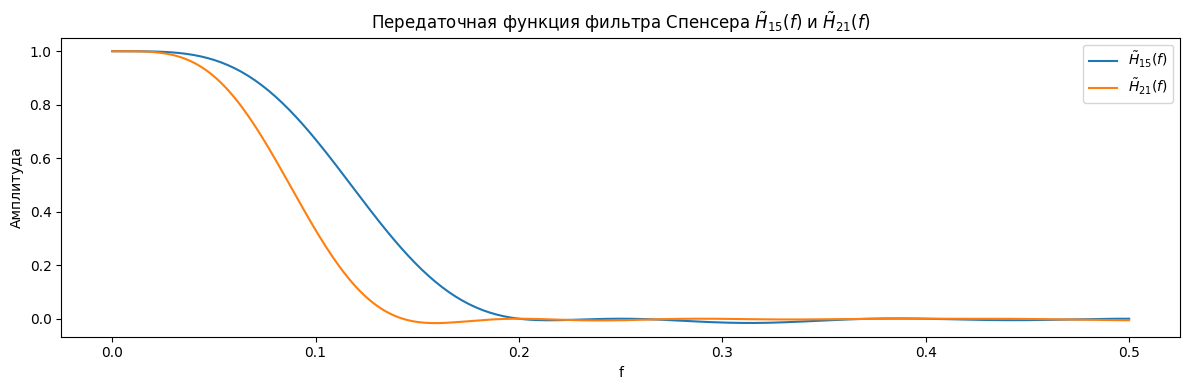

In [22]:
def H_spencer_15(f):
    a0 = 74
    a1 = 67
    a2 = 46
    a3 = 21
    a4 = 3
    a5 = -5
    a6 = -6
    a7 = -3
    d = 320

    res = a0 + 2 * (
        a1 * np.cos(2 * math.pi * f)
        + a2 * np.cos(2 * math.pi * f * 2)
        + a3 * np.cos(2 * math.pi * f * 3)
        + a4 * np.cos(2 * math.pi * f * 4)
        + a5 * np.cos(2 * math.pi * f * 5)
        + a6 * np.cos(2 * math.pi * f * 6)
        + a7 * np.cos(2 * math.pi * f * 7)
    )
    return res / d


def H_spencer_21(f):
    a0 = 60
    a1 = 57
    a2 = 47
    a3 = 33
    a4 = 18
    a5 = 6
    a6 = -2
    a7 = -5
    a8 = -5
    a9 = -3
    a10 = -1
    d = 350

    res = a0 + 2 * (
        a1 * np.cos(2 * math.pi * f)
        + a2 * np.cos(2 * math.pi * f * 2)
        + a3 * np.cos(2 * math.pi * f * 3)
        + a4 * np.cos(2 * math.pi * f * 4)
        + a5 * np.cos(2 * math.pi * f * 5)
        + a6 * np.cos(2 * math.pi * f * 6)
        + a7 * np.cos(2 * math.pi * f * 7)
        + a8 * np.cos(2 * math.pi * f * 8)
        + a9 * np.cos(2 * math.pi * f * 9)
        + a10 * np.cos(2 * math.pi * f * 10)
    )
    return res / d


f = np.linspace(-0.0, 0.5, 300)
plt.figure(figsize=(12, 4))
plt.plot(f, H_spencer_15(f), label="$ \\tilde{H}_{15}(f) $")
plt.plot(f, H_spencer_21(f), label="$ \\tilde{H}_{21}(f) $")
plt.title('Передаточная функция фильтра Спенсера $ \\tilde{H}_{15}(f) $ и $ \\tilde{H}_{21}(f) $')
plt.ylabel('Амплитуда')
plt.xlabel('f')
plt.tight_layout()
plt.legend()
plt.show()

Как видно из графиков, фильтры Спенсера также являются низкочастотными фильтрами.

При этом фильтры Спенсера не имеют больших колебаний амплитуды передаточной функции с увеличением частоты, что отличает их от предыдущих фильтров.

### Задание 5

Построить графики из предыдущих пунктов в логарифмической шкале (Дб). Объясните, чем отличаются данные графики от полученных ранее и объясните их смысл.


Перевод значений передаточной функции в логарифмическую шкалу (Дб) осуществляется по формуле:

$Дб = 20 \lg \left(\left|\frac{y_n}{s_n}\right|\right) = 20 \lg (|H(w)|)$

<Figure size 1200x1200 with 0 Axes>

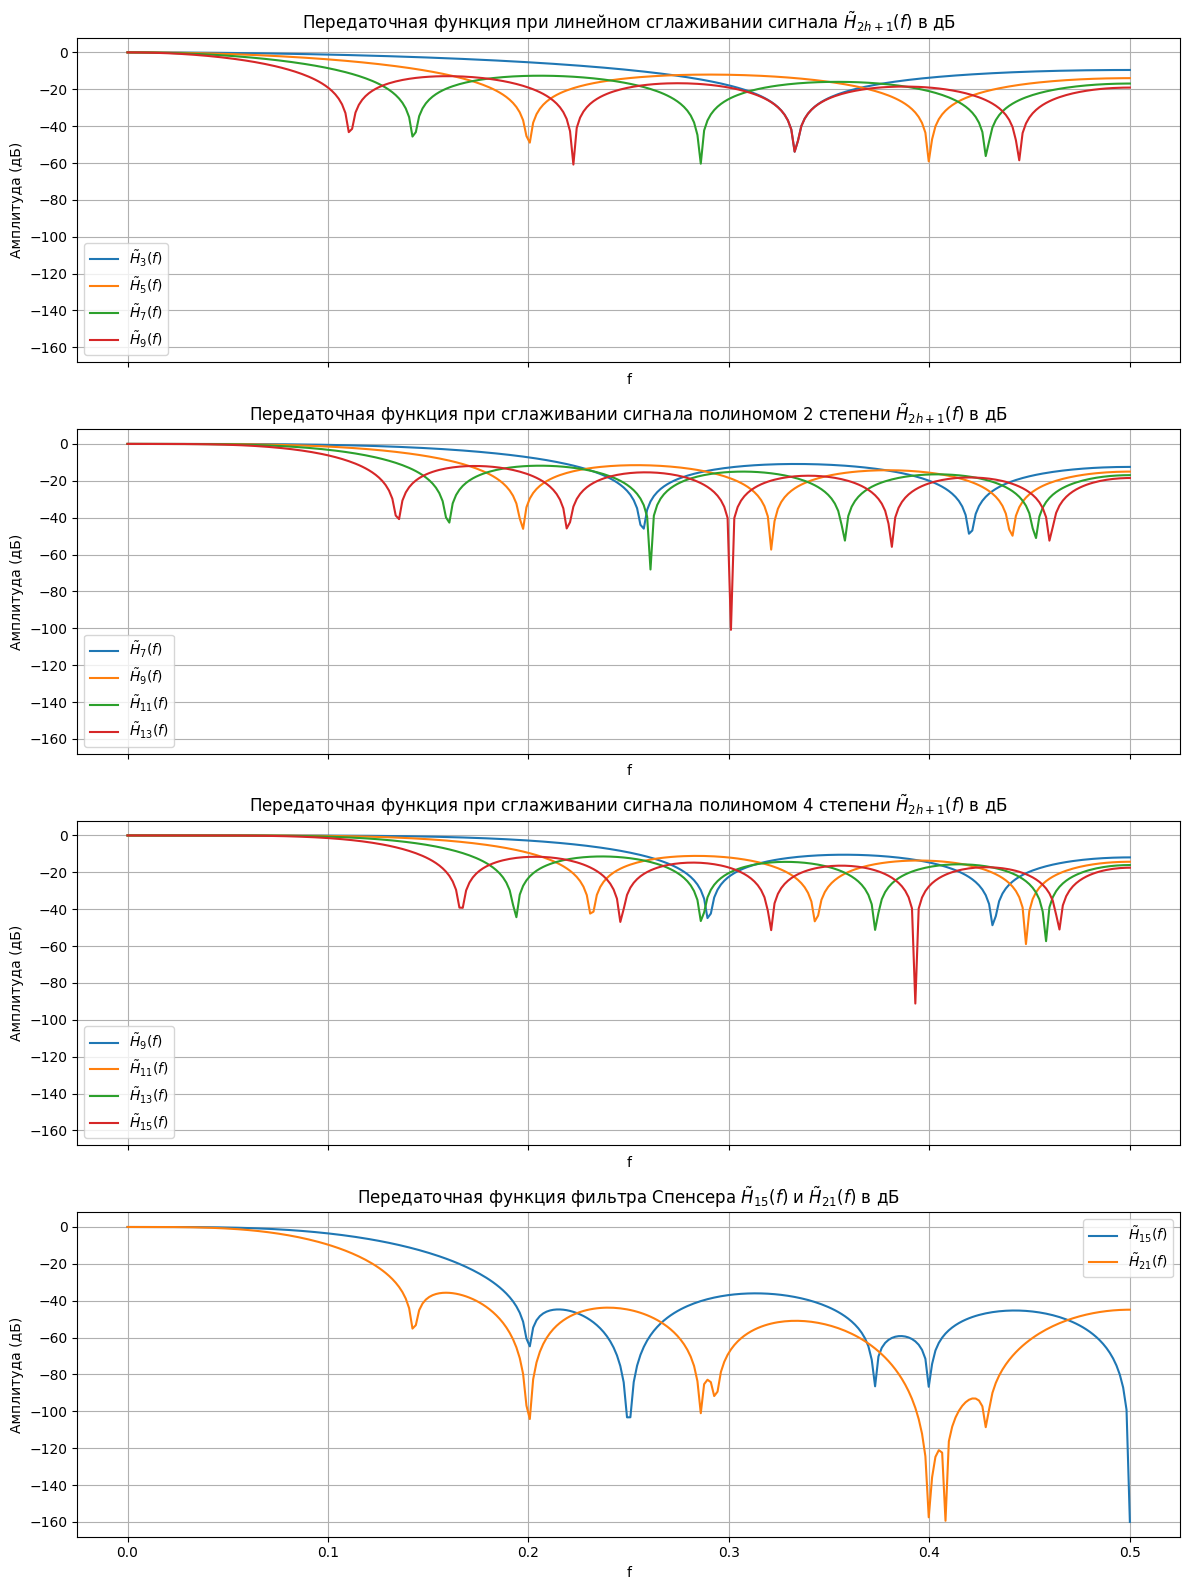

In [30]:
def Db_scale(H):
    abs_H = np.abs(H)
    epsilon = 1e-8
    result = np.where(abs_H > epsilon, abs_H, -8)
    return 20 * np.log10(result, out=result, where=result > epsilon)


f = np.linspace(-0.0, 0.5, 300)
plt.figure(figsize=(12, 12))
fig, axs = plt.subplots(4, 1, figsize=(12, 16), sharex=True, sharey=True)
plt.subplot(4, 1, 1)
for i in range(1, 5):
    plt.plot(
        f, Db_scale(H_1(f, i)), label="$ \\tilde{H}_{" + str(2 * i + 1) + "}(f) $"
    )
plt.title(
    'Передаточная функция при линейном сглаживании сигнала $ \\tilde{H}_{2h+1}(f) $ в дБ'
)
plt.ylabel('Амплитуда (дБ)')
plt.xlabel('f')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.subplot(4, 1, 2)
for i in range(3, 7):
    plt.plot(
        f, Db_scale(H_2(f, i)), label="$ \\tilde{H}_{" + str(2 * i + 1) + "}(f) $"
    )
plt.title(
    'Передаточная функция при сглаживании сигнала полиномом 2 степени $ \\tilde{H}_{2h+1}(f) $ в дБ'
)
plt.ylabel('Амплитуда (дБ)')
plt.xlabel('f')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.subplot(4, 1, 3)
for i in range(4, 8):
    plt.plot(
        f, Db_scale(H_3(f, i)), label="$ \\tilde{H}_{" + str(2 * i + 1) + "}(f) $"
    )
plt.title(
    'Передаточная функция при сглаживании сигнала полиномом 4 степени $ \\tilde{H}_{2h+1}(f) $ в дБ'
)
plt.ylabel('Амплитуда (дБ)')
plt.xlabel('f')
plt.grid(True)
plt.tight_layout()
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(f, Db_scale(H_spencer_15(f)), label="$ \\tilde{H}_{15}(f) $")
plt.plot(f, Db_scale(H_spencer_21(f)), label="$ \\tilde{H}_{21}(f) $")
plt.title(
    'Передаточная функция фильтра Спенсера $ \\tilde{H}_{15}(f) $ и $ \\tilde{H}_{21}(f) $ в дБ'
)
plt.ylabel('Амплитуда (дБ)')
plt.xlabel('f')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

На линейном графике амплитуда передаточной функции хорошо видно основные характеристики фильтра, такие как главная полоса пропускания и наличие колебаний амплитуды.

В логарифмической шкале (Дб) акцентируется внимание на диапазоне затухания и полосе подавления фильтра. Это позволяет лучше оценить эффективность фильтрации высокочастотных компонентов сигнала.

В контексте текущих фильтром на логарифмических графиках становится более очевидным, насколько эффективно фильтр подавляет высокочастотные шумы, что особенно важно при анализе сигналов с низким уровнем шума.

### Задание 6

Провести сопоставительный анализ свойств передаточных функций, полученных при выполнении п. 1–4.


Все исследованные фильтры имеют низкочастотные характер: при увеличении частоты амплитуда передаточной функции уменьшается. Они эффективно подавляют высокочастотные компоненты сигнала и пропускают низкочастотные, что делает их полезными для сглаживания дискретных сигналов.

При линейном сглаживании спад амплитуды происходит относительно плавно, но подавление высоких частот ограничено (до примерно –20 дБ).
При полиномиальном сглаживании 2-й и 4-й степени фильтры становятся более избирательными — затухание в области высоких частот усиливается, форма передаточной функции становится более сложной, что улучшает качество сглаживания.

Фильтр Спенсера демонстрирует наилучшие характеристики: он обеспечивает самое сильное подавление высоких частот (до –40 дБ и ниже), при этом сохраняя гладкий характер в низкочастотной области.

## Выводы

В ходе выполнения были рассмотрены фильтры, реализующие линейное и полиномиальное сглаживание различных порядков, а также фильтр Спенсера.

Линейное сглаживание представляет собой простое усреднение соседних отсчётов и обладает выраженными низкочастотными свойствами.

При полиномиальном сглаживании установлено, что с увеличением степени аппроксимации повышается точность сохранения тренда и усиливается подавление высокочастотных составляющих. Фильтры Спенсера продемонстрировали наилучшее подавление высоких частот (до –40 дБ и ниже) и более равномерную характеристику в области низких частот, что делает их наиболее эффективными для сглаживания сигналов с шумом.

Сравнение графиков в линейной и логарифмической шкалах показало, что логарифмическое представление нагляднее демонстрирует степень ослабления высоких частот и глубину подавления шума. В тоже время, линейные графики позволяют лучше оценить общую форму передаточной функции и выявить полосы пропускания и затухания.

В результате исследования были изучены особенности поведения нерекурсивных фильтров сглаживания и их передаточных функций.

<!-- Мы кибер-котлета!!! -->
